In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbs
from scipy import interpolate

Text(0.5, 0, 'Frequency (MHz)')

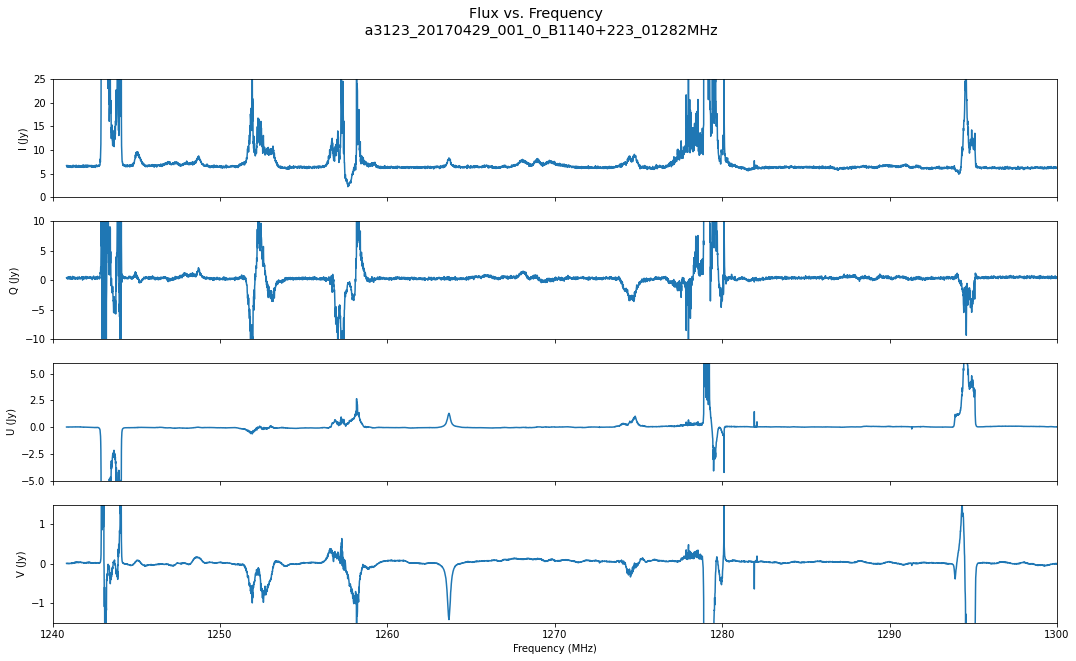

In [66]:
#Data

#C:\Users\Iliomar Rodriguez\OneDrive\Documents\Research_plots\PHL_data\DATA\20200506 SGR 1935+2154.zip\20200506 SGR 1935+2154\data

var_1 = "Freq, I_mean, I_error, Q_mean, Q_error, U_mean, U_error, V_mean, V_error"
#var_2 = "Freq, I_mean, I_error, Q_mean, Q_error, U_mean, U_error, V_mean, V_error"
#file_name_1 = "a3123_20200506_060_0_SGR1935+2154_01282MHz_DRIFT_ON_spectra.csv"
file_name_1 = "a3123_20170429_001_0_B1140+223_01282MHz_ONOFF_OFF_spectra.csv"
data_1 = np.genfromtxt(file_name_1, delimiter=",", skip_header = 1, names = var_1)
#data_2 = np.genfromtxt(file_name_2, delimiter=",", skip_header = 1, names = var_2)


data_freq = data_1["Freq"] #+ data_2["Freq"]
data_flux_I = data_1["I_mean"] #- data_2["I_mean"]
data_flux_Q = data_1["Q_mean"] #- data_2["Q_mean"]
data_flux_U = data_1["U_mean"] #- data_2["U_mean"]
data_flux_V = data_1["V_mean"] #- data_2["V_mean"]


#Plots
fig, axs = plt.subplots(4, 1, sharex = True, figsize=(18,10))

fig.suptitle("Flux vs. Frequency \n a3123_20170429_001_0_B1140+223_01282MHz", fontsize="x-large")

axs[0].plot(data_freq, data_flux_I)
axs[0].set_ylabel('I (Jy)')
axs[0].set_ylim(0, 25)
axs[0].set_xlim(1240, 1300)

axs[1].plot(data_freq, data_flux_Q)
axs[1].set_ylabel('Q (Jy)')
axs[1].set_ylim(-10, 10)
axs[1].set_xlim(1240, 1300)

axs[2].plot(data_freq, data_flux_U)
axs[2].set_ylabel('U (Jy)')
axs[2].set_ylim(-5, 6)
axs[2].set_xlim(1240, 1300)

axs[3].plot(data_freq, data_flux_V)
axs[3].set_ylabel('V (Jy)')
axs[3].set_xlim(1240, 1300)
axs[3].set_ylim(-1.5, 1.5)
axs[3].set_xlabel('Frequency (MHz)')



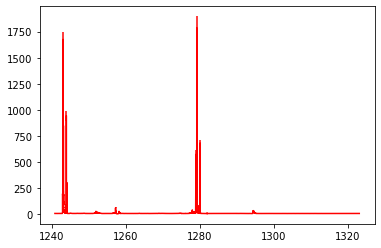

In [32]:
var = "Freq, I_mean, I_error, Q_mean, Q_error, U_mean, U_error, V_mean, V_error"
file_name = "a3123_20170429_001_0_B1140+223_01282MHz_ONOFF_OFF_spectra.csv"
data = np.genfromtxt(file_name, delimiter=",", skip_header = 1, names = var)


x = data["Freq"]
y = data["I_mean"]
y_err = data["I_error"]

plt.errorbar(x, y, y_err, color="r")
plt.show()

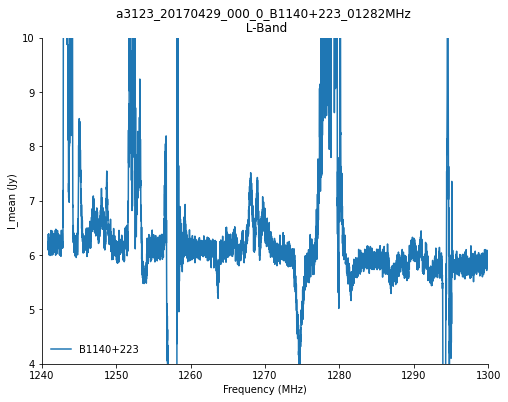

In [56]:
source = 'B1140+223' # select desired quasar

freq_range = [1000, 2000] # MHz (L-band)
#freq_range = [4000, 5000] # MHz (C-band)

import matplotlib.pyplot as plt
import numpy as np
import sys

data_source = 'calibrators.txt'

# Read data_source and get parameters a0, a1, a2
# -------------------------------------------------------------------

flag = False

with open(data_source, 'r') as fp:
    # read all lines in a list
    lines = fp.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(source) != -1:
            # print(source, 'string exists in file')
            # print('Line Number:', lines.index(line))
            # print('Line:', line)
            data = line.split()
            flag = True
            
if flag == False:
    sys.exit('ERROR: source ' + source + ' not found!' )
    
a0 = float(data[1])
a1 = float(data[2])
a2 = float(data[3])

# Flux density as function of frequency
# -------------------------------------------------------------------


freq = np.arange(freq_range[0], freq_range[1], 1)

x = np.log10(freq)
y = a0 + a1*x + a2*np.exp(-x)
S = 10**y

# Plot
# -------------------------------------------------------------------


#Read files

df_on = pd.read_csv("a3123_20170429_000_0_B1140+223_01282MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off = pd.read_csv("a3123_20170429_001_0_B1140+223_01282MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df = pd.DataFrame()
df["I_mean (Jy)"] = df_on["I_mean (Jy)"] - df_off["I_mean (Jy)"]
df["Frequency (MHz)"] = df_on["Frequency (MHz)"]
# define size and hide top ans right axis

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# plot and save figure
plt.plot(df["Frequency (MHz)"], df["I_mean (Jy)"])
plt.plot(freq, S, color = 'black')
plt.xlim(1240, 1300)
plt.ylim(4, 10)
plt.title("a3123_20170429_000_0_B1140+223_01282MHz \n L-Band")
plt.xlabel('Frequency (MHz)')
plt.ylabel('I_mean (Jy)')
plt.legend([source], frameon = False)

plt.savefig(source + '.pdf', bbox_inches="tight")
plt.show()

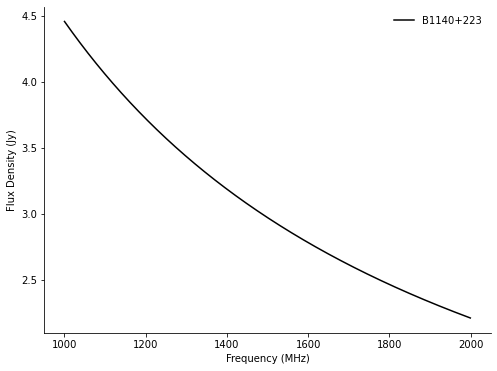

In [34]:
# General definitions
# -------------------------------------------------------------------

source = 'B1140+223' # select desired quasar

freq_range = [1000, 2000] # MHz (L-band)
# freq_range = [4000, 5000] # MHz (C-band)

import matplotlib.pyplot as plt
import numpy as np
import sys

data_source = 'calibrators.txt'

# Read data_source and get parameters a0, a1, a2
# -------------------------------------------------------------------

flag = False

with open(data_source, 'r') as fp:
    # read all lines in a list
    lines = fp.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(source) != -1:
            # print(source, 'string exists in file')
            # print('Line Number:', lines.index(line))
            # print('Line:', line)
            data = line.split()
            flag = True
            
if flag == False:
    sys.exit('ERROR: source ' + source + ' not found!' )
    
a0 = float(data[1])
a1 = float(data[2])
a2 = float(data[3])

# Flux density as function of frequency
# -------------------------------------------------------------------

freq = np.arange(freq_range[0], freq_range[1], 1)

x = np.log10(freq)
y = a0 + a1*x + a2*np.exp(-x)
S = 10**y

# Plot
# -------------------------------------------------------------------

# define size and hide top ans right axis

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# plot and save figure

plt.plot(freq, S, color = 'black')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux Density (Jy)')
plt.legend([source], frameon = False)

plt.savefig(source + '.pdf', bbox_inches="tight")
plt.show()

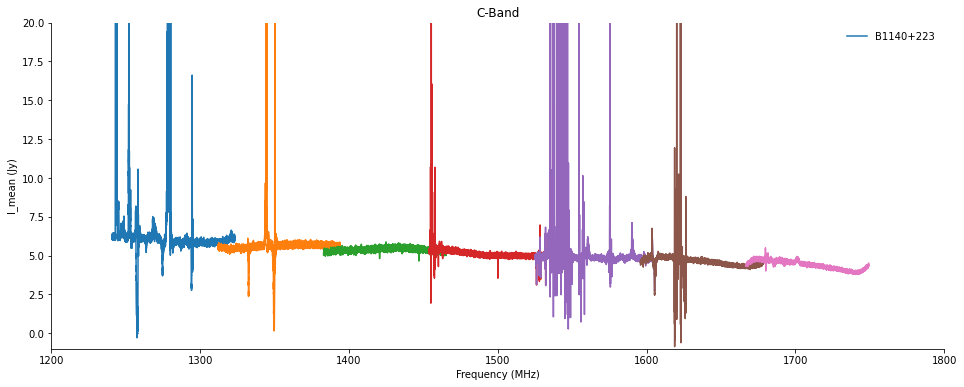

In [43]:
source = 'B1140+223' # select desired quasar

#freq_range = [1000, 2000] # MHz (L-band)
freq_range = [4000, 5000] # MHz (C-band)

import matplotlib.pyplot as plt
import numpy as np
import sys

data_source = 'calibrators.txt'

# Read data_source and get parameters a0, a1, a2
# -------------------------------------------------------------------

flag = False

with open(data_source, 'r') as fp:
    # read all lines in a list
    lines = fp.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(source) != -1:
            # print(source, 'string exists in file')
            # print('Line Number:', lines.index(line))
            # print('Line:', line)
            data = line.split()
            flag = True
            
if flag == False:
    sys.exit('ERROR: source ' + source + ' not found!' )
    
a0 = float(data[1])
a1 = float(data[2])
a2 = float(data[3])

# Flux density as function of frequency
# -------------------------------------------------------------------


freq = np.arange(freq_range[0], freq_range[1], 1)

x = np.log10(freq)
y = a0 + a1*x + a2*np.exp(-x)
S = 10**y

# Plot
# -------------------------------------------------------------------

#Read files

df_on = pd.read_csv("a3123_20170429_000_0_B1140+223_01282MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off = pd.read_csv("a3123_20170429_001_0_B1140+223_01282MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on1 = pd.read_csv("a3123_20170429_000_1_B1140+223_01353MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off1 = pd.read_csv("a3123_20170429_001_1_B1140+223_01353MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on2 = pd.read_csv("a3123_20170429_000_2_B1140+223_01424MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off2 = pd.read_csv("a3123_20170429_001_2_B1140+223_01424MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on3 = pd.read_csv("a3123_20170429_000_3_B1140+223_01495MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off3 = pd.read_csv("a3123_20170429_001_3_B1140+223_01495MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on4 = pd.read_csv("a3123_20170429_000_4_B1140+223_01566MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off4 = pd.read_csv("a3123_20170429_001_4_B1140+223_01566MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on5 = pd.read_csv("a3123_20170429_000_5_B1140+223_01637MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off5 = pd.read_csv("a3123_20170429_001_5_B1140+223_01637MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on6 = pd.read_csv("a3123_20170429_000_6_B1140+223_01708MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off6 = pd.read_csv("a3123_20170429_001_6_B1140+223_01708MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df = pd.DataFrame()
df["I_mean (Jy)"] = df_on["I_mean (Jy)"] - df_off["I_mean (Jy)"]
df["Frequency (MHz)"] = df_on["Frequency (MHz)"]

df1 = pd.DataFrame()
df1["I_mean (Jy)"] = df_on1["I_mean (Jy)"] - df_off1["I_mean (Jy)"]
df1["Frequency (MHz)"] = df_on1["Frequency (MHz)"]

df2 = pd.DataFrame()
df2["I_mean (Jy)"] = df_on2["I_mean (Jy)"] - df_off2["I_mean (Jy)"]
df2["Frequency (MHz)"] = df_on2["Frequency (MHz)"]

df3 = pd.DataFrame()
df3["I_mean (Jy)"] = df_on3["I_mean (Jy)"] - df_off3["I_mean (Jy)"]
df3["Frequency (MHz)"] = df_on3["Frequency (MHz)"]

df4 = pd.DataFrame()
df4["I_mean (Jy)"] = df_on4["I_mean (Jy)"] - df_off4["I_mean (Jy)"]
df4["Frequency (MHz)"] = df_on4["Frequency (MHz)"]

df5 = pd.DataFrame()
df5["I_mean (Jy)"] = df_on5["I_mean (Jy)"] - df_off5["I_mean (Jy)"]
df5["Frequency (MHz)"] = df_on5["Frequency (MHz)"]

df6 = pd.DataFrame()
df6["I_mean (Jy)"] = df_on6["I_mean (Jy)"] - df_off6["I_mean (Jy)"]
df6["Frequency (MHz)"] = df_on6["Frequency (MHz)"]
# define size and hide top ans right axis

fig = plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# plot and save figure
plt.plot(df["Frequency (MHz)"], df["I_mean (Jy)"])
plt.plot(df1["Frequency (MHz)"], df1["I_mean (Jy)"])
plt.plot(df2["Frequency (MHz)"], df2["I_mean (Jy)"])
plt.plot(df3["Frequency (MHz)"], df3["I_mean (Jy)"])
plt.plot(df4["Frequency (MHz)"], df4["I_mean (Jy)"])
plt.plot(df5["Frequency (MHz)"], df5["I_mean (Jy)"])
plt.plot(df6["Frequency (MHz)"], df6["I_mean (Jy)"])
plt.plot(freq, S, color = 'black')
plt.title("C-Band")
plt.xlabel('Frequency (MHz)')
plt.ylabel('I_mean (Jy)')
plt.xlim(1200, 1800)
plt.ylim(-1, 20)
plt.legend([source], frameon = False)

plt.savefig(source + '.pdf', bbox_inches="tight")
plt.show()

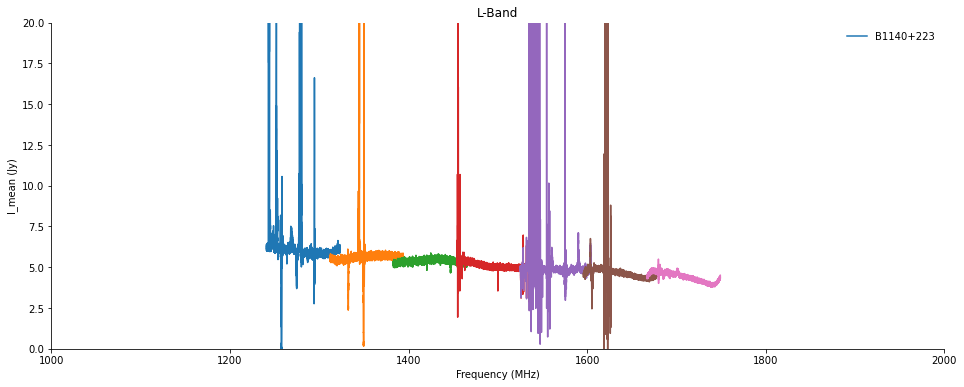

In [37]:
source = 'B1140+223' # select desired quasar

#freq_range = [1000, 2000] # MHz (L-band)
freq_range = [4000, 5000] # MHz (C-band)

import matplotlib.pyplot as plt
import numpy as np
import sys

data_source = 'calibrators.txt'

# Read data_source and get parameters a0, a1, a2
# -------------------------------------------------------------------

flag = False

with open(data_source, 'r') as fp:
    # read all lines in a list
    lines = fp.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(source) != -1:
            # print(source, 'string exists in file')
            # print('Line Number:', lines.index(line))
            # print('Line:', line)
            data = line.split()
            flag = True
            
if flag == False:
    sys.exit('ERROR: source ' + source + ' not found!' )
    
a0 = float(data[1])
a1 = float(data[2])
a2 = float(data[3])

# Flux density as function of frequency
# -------------------------------------------------------------------


freq = np.arange(freq_range[0], freq_range[1], 1)

x = np.log10(freq)
y = a0 + a1*x + a2*np.exp(-x)
S = 10**y

# Plot
# -------------------------------------------------------------------

#Read files

df_on = pd.read_csv("a3123_20170429_000_0_B1140+223_01282MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off = pd.read_csv("a3123_20170429_001_0_B1140+223_01282MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on1 = pd.read_csv("a3123_20170429_000_1_B1140+223_01353MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off1 = pd.read_csv("a3123_20170429_001_1_B1140+223_01353MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on2 = pd.read_csv("a3123_20170429_000_2_B1140+223_01424MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off2 = pd.read_csv("a3123_20170429_001_2_B1140+223_01424MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on3 = pd.read_csv("a3123_20170429_000_3_B1140+223_01495MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off3 = pd.read_csv("a3123_20170429_001_3_B1140+223_01495MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on4 = pd.read_csv("a3123_20170429_000_4_B1140+223_01566MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off4 = pd.read_csv("a3123_20170429_001_4_B1140+223_01566MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on5 = pd.read_csv("a3123_20170429_000_5_B1140+223_01637MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off5 = pd.read_csv("a3123_20170429_001_5_B1140+223_01637MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on6 = pd.read_csv("a3123_20170429_000_6_B1140+223_01708MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off6 = pd.read_csv("a3123_20170429_001_6_B1140+223_01708MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df = pd.DataFrame()
df["I_mean (Jy)"] = df_on["I_mean (Jy)"] - df_off["I_mean (Jy)"]
df["Frequency (MHz)"] = df_on["Frequency (MHz)"]

df1 = pd.DataFrame()
df1["I_mean (Jy)"] = df_on1["I_mean (Jy)"] - df_off1["I_mean (Jy)"]
df1["Frequency (MHz)"] = df_on1["Frequency (MHz)"]

df2 = pd.DataFrame()
df2["I_mean (Jy)"] = df_on2["I_mean (Jy)"] - df_off2["I_mean (Jy)"]
df2["Frequency (MHz)"] = df_on2["Frequency (MHz)"]

df3 = pd.DataFrame()
df3["I_mean (Jy)"] = df_on3["I_mean (Jy)"] - df_off3["I_mean (Jy)"]
df3["Frequency (MHz)"] = df_on3["Frequency (MHz)"]

df4 = pd.DataFrame()
df4["I_mean (Jy)"] = df_on4["I_mean (Jy)"] - df_off4["I_mean (Jy)"]
df4["Frequency (MHz)"] = df_on4["Frequency (MHz)"]

df5 = pd.DataFrame()
df5["I_mean (Jy)"] = df_on5["I_mean (Jy)"] - df_off5["I_mean (Jy)"]
df5["Frequency (MHz)"] = df_on5["Frequency (MHz)"]

df6 = pd.DataFrame()
df6["I_mean (Jy)"] = df_on6["I_mean (Jy)"] - df_off6["I_mean (Jy)"]
df6["Frequency (MHz)"] = df_on6["Frequency (MHz)"]
# define size and hide top ans right axis

fig = plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# plot and save figure
plt.plot(df["Frequency (MHz)"], df["I_mean (Jy)"])
plt.plot(df1["Frequency (MHz)"], df1["I_mean (Jy)"])
plt.plot(df2["Frequency (MHz)"], df2["I_mean (Jy)"])
plt.plot(df3["Frequency (MHz)"], df3["I_mean (Jy)"])
plt.plot(df4["Frequency (MHz)"], df4["I_mean (Jy)"])
plt.plot(df5["Frequency (MHz)"], df5["I_mean (Jy)"])
plt.plot(df6["Frequency (MHz)"], df6["I_mean (Jy)"])
plt.plot(freq, S, color = 'black')
plt.title("L-Band")
plt.xlabel('Frequency (MHz)')
plt.ylabel('I_mean (Jy)')
plt.xlim(1000, 2000)
plt.ylim(0, 20)
plt.legend([source], frameon = False)

plt.savefig(source + '.pdf', bbox_inches="tight")
plt.show()

In [38]:
source = 'B1140+223' # select desired quasar

freq_range = [1000, 2000] # MHz (L-band)
#freq_range1 = [4000, 5000] # MHz (C-band)

import matplotlib.pyplot as plt
import numpy as np
import sys

data_source = 'calibrators.txt'

# Read data_source and get parameters a0, a1, a2
# -------------------------------------------------------------------

flag = False

with open(data_source, 'r') as fp:
    # read all lines in a list
    lines = fp.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(source) != -1:
            # print(source, 'string exists in file')
            # print('Line Number:', lines.index(line))
            # print('Line:', line)
            data = line.split()
            flag = True
            
if flag == False:
    sys.exit('ERROR: source ' + source + ' not found!' )
    
a0 = float(data[1])
a1 = float(data[2])
a2 = float(data[3])

a01 = float(data[1])
a11 = float(data[2])
a21 = float(data[3])

# Flux density as function of frequency
# -------------------------------------------------------------------


freq = np.arange(freq_range[0], freq_range[1], 1)

x = np.log10(freq)
y = a0 + a1*x + a2*np.exp(-x)
S = 10**y


freq1 = np.arange(freq_range1[0], freq_range1[1], 1)

x1 = np.log10(freq1)
y1 = a01 + a11*x1 + a21*np.exp(-x1)
S1 = 10**y1


# Plot
# -------------------------------------------------------------------

#Read files

df_on = pd.read_csv("a3123_20200506_060_0_SGR1935+2154_01282MHz_DRIFT_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
'''
df_off = pd.read_csv("a3123_20170429_001_0_B1140+223_01282MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on1 = pd.read_csv("a3123_20170429_000_1_B1140+223_01353MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off1 = pd.read_csv("a3123_20170429_001_1_B1140+223_01353MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on2 = pd.read_csv("a3123_20170429_000_2_B1140+223_01424MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off2 = pd.read_csv("a3123_20170429_001_2_B1140+223_01424MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on3 = pd.read_csv("a3123_20170429_000_3_B1140+223_01495MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off3 = pd.read_csv("a3123_20170429_001_3_B1140+223_01495MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on4 = pd.read_csv("a3123_20170429_000_4_B1140+223_01566MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off4 = pd.read_csv("a3123_20170429_001_4_B1140+223_01566MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on5 = pd.read_csv("a3123_20170429_000_5_B1140+223_01637MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off5 = pd.read_csv("a3123_20170429_001_5_B1140+223_01637MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])

df_on6 = pd.read_csv("a3123_20170429_000_6_B1140+223_01708MHz_ONOFF_ON_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
df_off6 = pd.read_csv("a3123_20170429_001_6_B1140+223_01708MHz_ONOFF_OFF_spectra.csv", usecols=["Frequency (MHz)", "I_mean (Jy)"])
'''
df = pd.DataFrame()
df["I_mean (Jy)"] = df_on["I_mean (Jy)"]
df["Frequency (MHz)"] = df_on["Frequency (MHz)"]

'''
df1 = pd.DataFrame()
df1["I_mean (Jy)"] = df_on1["I_mean (Jy)"] - df_off1["I_mean (Jy)"]
df1["Frequency (MHz)"] = df_on1["Frequency (MHz)"]

df2 = pd.DataFrame()
df2["I_mean (Jy)"] = df_on2["I_mean (Jy)"] - df_off2["I_mean (Jy)"]
df2["Frequency (MHz)"] = df_on2["Frequency (MHz)"]

df3 = pd.DataFrame()
df3["I_mean (Jy)"] = df_on3["I_mean (Jy)"] - df_off3["I_mean (Jy)"]
df3["Frequency (MHz)"] = df_on3["Frequency (MHz)"]

df4 = pd.DataFrame()
df4["I_mean (Jy)"] = df_on4["I_mean (Jy)"] - df_off4["I_mean (Jy)"]
df4["Frequency (MHz)"] = df_on4["Frequency (MHz)"]

df5 = pd.DataFrame()
df5["I_mean (Jy)"] = df_on5["I_mean (Jy)"] - df_off5["I_mean (Jy)"]
df5["Frequency (MHz)"] = df_on5["Frequency (MHz)"]

df6 = pd.DataFrame()
df6["I_mean (Jy)"] = df_on6["I_mean (Jy)"] - df_off6["I_mean (Jy)"]
df6["Frequency (MHz)"] = df_on6["Frequency (MHz)"]
'''
# define size and hide top ans right axis
'''
fig = plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
'''
# plot and save figure


fig, axs = plt.subplots(2, 1, sharex = True, figsize=(18,10))

fig.suptitle("Flux vs. Frequency \n a3123_20200506_060_0_SGR1935+2154_01282MHz", fontsize="x-large")

axs[0].plot(df["Frequency (MHz)"], df["I_mean (Jy)"])
axs[0].set_ylabel('I (Jy)')
#axs[0].set_ylim(-0.5, 15)
#axs[0].set_xlim(1240, 1300)
axs[0].title("L-Band")

axs[1].plot(df["Frequency (MHz)"], df["I_mean (Jy)"])
#axs[1].set_ylabel('Q (Jy)')
#axs[1].set_ylim(-30, 30)
#axs[1].set_xlim(1240, 1325)
axs[1].title("C-Band")


'''
plt.plot(df["Frequency (MHz)"], df["I_mean (Jy)"])
#plt.plot(df1["Frequency (MHz)"], df1["I_mean (Jy)"])
#plt.plot(df2["Frequency (MHz)"], df2["I_mean (Jy)"])
#plt.plot(df3["Frequency (MHz)"], df3["I_mean (Jy)"])
#plt.plot(df4["Frequency (MHz)"], df4["I_mean (Jy)"])
#plt.plot(df5["Frequency (MHz)"], df5["I_mean (Jy)"])
#plt.plot(df6["Frequency (MHz)"], df6["I_mean (Jy)"])
#plt.plot(freq, S, color = 'black')
plt.title("C-Band")
plt.xlabel('Frequency (MHz)')
plt.ylabel('I_mean (Jy)')
plt.xlim(1240, 1300)
plt.ylim(5, 100)
plt.legend([source], frameon = False)

plt.savefig(source + '.pdf', bbox_inches="tight")
plt.show()'''

NameError: name 'freq_range1' is not defined

48.19069829582863
47.94797723393803
1.3978803935423516
1.7448806706332614
12.954889967644442
2.9064891585754475
0.20097905151637227
-0.27624309162711325


Text(0.5, 0, 'Frequency (MHz)')

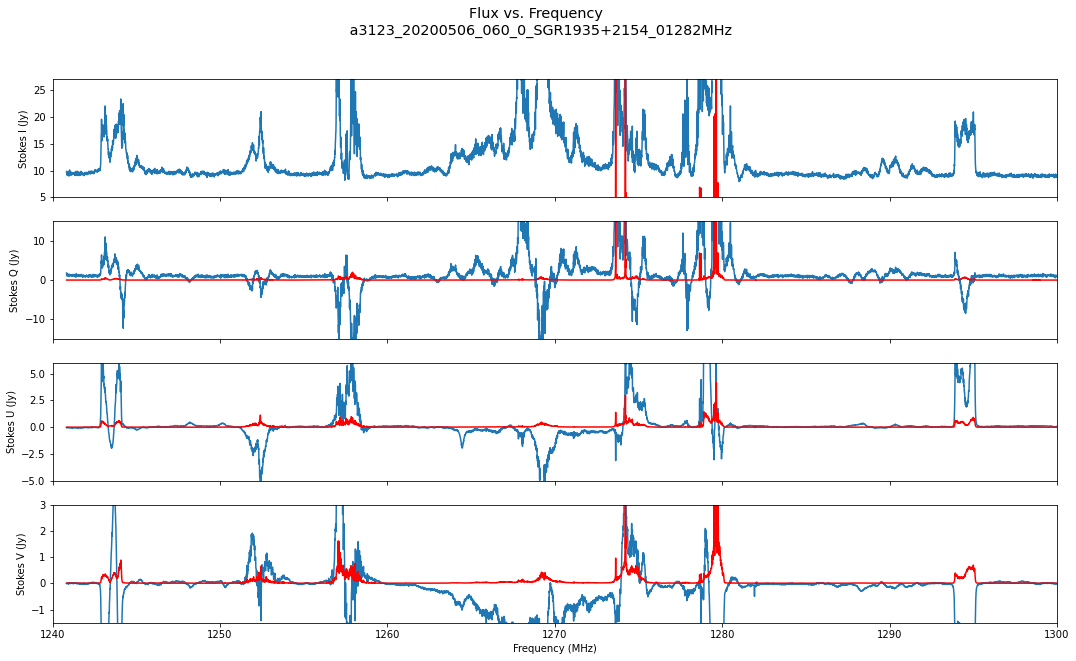

In [27]:
#Data

#C:\Users\Iliomar Rodriguez\OneDrive\Documents\Research_plots\PHL_data\DATA\20200506 SGR 1935+2154.zip\20200506 SGR 1935+2154\data

var_1 = "Freq, I_mean, I_error, Q_mean, Q_error, U_mean, U_error, V_mean, V_error"
#var_2 = "Freq, I_mean, I_error, Q_mean, Q_error, U_mean, U_error, V_mean, V_error"
file_name_1 = "a3123_20200506_060_0_SGR1935+2154_01282MHz_DRIFT_ON_spectra.csv"
#file_name_2 = "a3123_20170429_001_0_B1140+223_01282MHz_ONOFF_OFF_spectra.csv"
data_1 = np.genfromtxt(file_name_1, delimiter=",", skip_header = 1, names = var_1)
#data_2 = np.genfromtxt(file_name_2, delimiter=",", skip_header = 1, names = var_2)


data_freq = data_1["Freq"] #+ data_2["Freq"]
data_flux_I = data_1["I_mean"] #- data_2["I_mean"]
data_flux_Q = data_1["Q_mean"] #- data_2["Q_mean"]
data_flux_U = data_1["U_mean"] #- data_2["U_mean"]
data_flux_V = data_1["V_mean"] #- data_2["V_mean"]

#Error

data_flux_I_err = data_1["I_error"] #- data_2["I_mean"]
data_flux_Q_err = data_1["Q_error"] #- data_2["Q_mean"]
data_flux_U_err = data_1["U_error"] #- data_2["U_mean"]
data_flux_V_err = data_1["V_error"] #- data_2["V_mean"]

#Standard Deviation

flux_I_std_dev = np.nanstd(data_flux_I)
flux_Q_std_dev = np.nanstd(data_flux_Q)
flux_U_std_dev = np.nanstd(data_flux_U)
flux_V_std_dev = np.nanstd(data_flux_V)

print(flux_I_std_dev)
print(flux_Q_std_dev)
print(flux_U_std_dev)
print(flux_V_std_dev)


#Mean 

flux_I_std_mean = np.nanmean(data_flux_I)
flux_Q_std_mean = np.nanmean(data_flux_Q)
flux_U_std_mean = np.nanmean(data_flux_U)
flux_V_std_mean = np.nanmean(data_flux_V)

print(flux_I_std_mean)
print(flux_Q_std_mean)
print(flux_U_std_mean)
print(flux_V_std_mean)

#Plots
fig, axs = plt.subplots(4, 1, sharex = True, figsize=(18,10))

fig.suptitle("Flux vs. Frequency \n a3123_20200506_060_0_SGR1935+2154_01282MHz", fontsize="x-large")

axs[0].plot(data_freq, data_flux_I)
axs[0].plot(data_freq, data_flux_I_err, "r")
axs[0].set_ylabel('Stokes I (Jy)')
axs[0].set_ylim(5, 27)
axs[0].set_xlim(1240, 1300)

axs[1].plot(data_freq, data_flux_Q)
axs[1].plot(data_freq, data_flux_Q_err, "r")
axs[1].set_ylabel('Stokes Q (Jy)')
axs[1].set_ylim(-15, 15)
axs[1].set_xlim(1240, 1300)

axs[2].plot(data_freq, data_flux_U)
axs[2].plot(data_freq, data_flux_U_err, "r")
axs[2].set_ylabel('Stokes U (Jy)')
axs[2].set_ylim(-5, 6)
axs[2].set_xlim(1240, 1300)

axs[3].plot(data_freq, data_flux_V)
axs[3].plot(data_freq, data_flux_V_err, "r")
axs[3].set_ylabel('Stokes V (Jy)')
axs[3].set_xlim(1240, 1300)
axs[3].set_ylim(-1.5, 3)
axs[3].set_xlabel('Frequency (MHz)')